In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
%%time
# определяем путь до необходимой папки
folder_data = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-bogdanova/shared/homeworks/python_ds_miniprojects/4/data'

#  читаем даты/папки
dates = os.listdir(folder_data)

# создаем словарь в котором ключ - дата, а ячейка - список клиентов
date_clients = {}
for i in dates:
    path = folder_data+'/'+i
    clients = os.listdir(path)
    date_clients[i] = clients
    
# Собираем все данные в список списков
all_data = []
for i in date_clients:
    for j in date_clients[i]:
        for k in open(folder_data+'/'+i+'/'+j+'/'+'data.csv').readlines():
            if k.startswith(',') == False:
                list_k = k.strip().split(',')
                all_data+=[[i, j, list_k[1], list_k[2]]]

# формируем DataFrame
df = pd.DataFrame(data=all_data, columns=['date', 'name', 'product_id', 'quantity'])

# Присваиваем столбцу date соответствующий формат данных
df.date = pd.to_datetime(df.date)

#Присваиваем столбцам quantity product_id тип int

df = df.astype({'quantity' : 'int', 'product_id' : 'int'})
df

CPU times: user 7.99 ms, sys: 1.78 ms, total: 9.77 ms
Wall time: 9.19 ms


,date,name,product_id,quantity
0,2020-12-05,Petr_Ivanov,27,4
1,2020-12-05,Petr_Ivanov,89,1
2,2020-12-05,Petr_Ivanov,33,2
3,2020-12-05,Petr_Ivanov,8,3
4,2020-12-05,Petr_Ivanov,16,1
...,...,...,...,...
156,2020-12-07,Petr_Fedorov,18,4
157,2020-12-07,Petr_Fedorov,94,4
158,2020-12-07,Vasiliy_Ivanov,95,2
159,2020-12-07,Vasiliy_Ivanov,83,3


In [22]:
%%time
# Попробуем еще раз решить ту же задачу создания DF, только через пустой DF и построчное добавление данных
# определяем путь до необходимой папки

path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-bogdanova/shared/homeworks/python_ds_miniprojects/4/data'

all_df = pd.DataFrame(columns = ['product_id', 'quantity', 'name', 'date'])
lst_path = []
for i in range(len(os.listdir(path))):
    path_inside = path + '/' + os.listdir(path)[i]
    for j in range(len(os.listdir(path_inside))):
        #os.listdir(path_inside)[j] Имя человека
        #os.listdir(path)[i] Дата
        path_to_file = path_inside + '/' + os.listdir(path_inside)[j] + '/' + 'data.csv'  # os.path.join is better for constructing path
        lst_path.append(path_to_file)
        df = pd.read_csv(path_to_file)
        df = df.drop(columns = 'Unnamed: 0')
        df['name'] = os.listdir(path_inside)[j]
        df['date'] = os.listdir(path)[i]
        all_df = pd.concat([all_df, df])

CPU times: user 199 ms, sys: 11.1 ms, total: 210 ms
Wall time: 210 ms


In [5]:
df.quantity.sum()

480

In [6]:
# Выясните, какой пользователь купил больше всего товаров. 
# Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке. 
client_product_count = df \
    .groupby('name', as_index = False) \
    .agg({'quantity' : 'sum'}) \
    .rename(columns = {'quantity' : 'sum_quantity'}) \
    .max().tolist()[1]
client_max_product_count = df \
    .groupby('name', as_index = False) \
    .agg({'quantity' : 'sum'}) \
    .rename(columns = {'quantity' : 'sum_quantity'}) \
    .query('sum_quantity == 52') \
    .sort_values('name')['name'].tolist()
client_max_product_count

['Alexey_Smirnov', 'Petr_Smirnov']

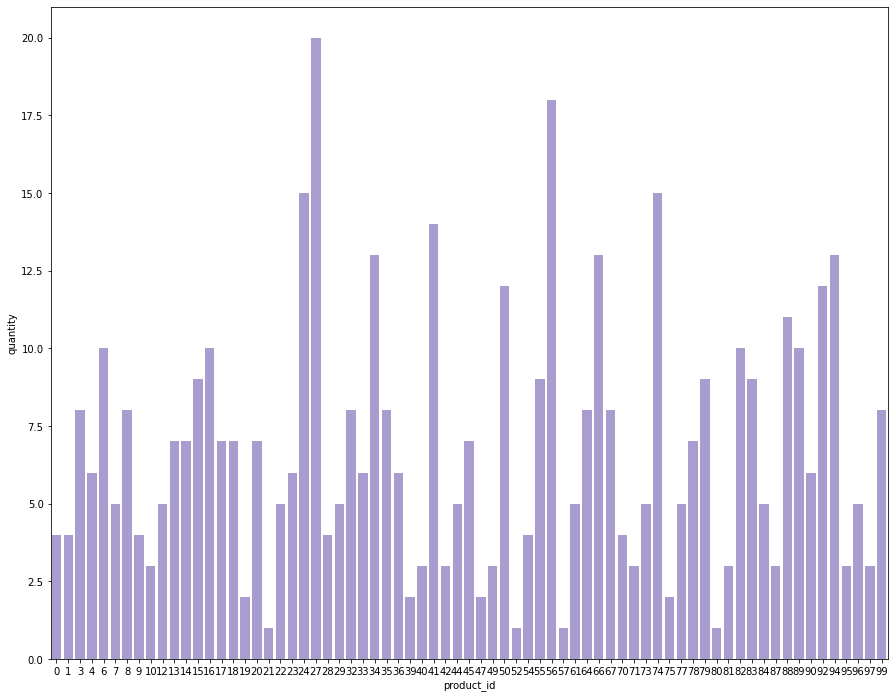

In [27]:
# Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:

# по оси x – идентификаторы товаров (product_id) 
# по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)
# Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

# В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56
plt.subplots(figsize=(15, 12))
for_barplot_product_id = df \
    .groupby('product_id', as_index = False) \
    .agg({'quantity' : 'sum'})
sns.barplot(data = for_barplot_product_id, x=for_barplot_product_id.product_id, y=for_barplot_product_id.quantity, color = (0.3, 0.17, 0.7, 1), alpha = 0.5)

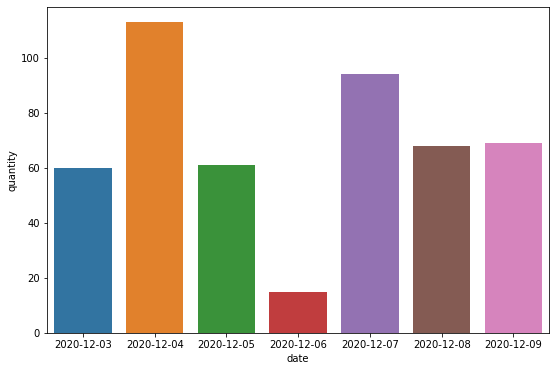

In [49]:
# Посмотрим на продажи по дням! 
# Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).
plt.subplots(figsize=(9, 6))
for_barplot_date = df \
    .groupby('date', as_index = False) \
    .agg({'quantity' : 'sum'})

for_barplot_date['date'] = for_barplot_date['date'].dt.strftime('%Y-%m-%d')
sns.barplot(data = for_barplot_date, x=for_barplot_date.date, y=for_barplot_date.quantity)


In [59]:
# Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
# Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 
df_second_time = df \
    .drop(columns = 'quantity') \
    .drop_duplicates() \
    .groupby(['name', 'product_id'], as_index = [False, False]) \
    .agg({'date' : 'count'}) \
    .query('date > 1')
df_second_time

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2


In [ ]:
# paths = []
# dirs_all = []
# files_all = []
# for path, dirs, files in os.walk(folder_data):
#     paths+=[path]
#     dirs_all += [dirs]
#     files_all += [files]
# # Удаление пустых списков
# dirs_all = list(filter(None, dirs_all))
# dirs_all
# df_2 = pd.DataFrame(data = dirs_all[1:6], columns = dirs_all[0])
#  df_2